# Capstone Project 2: Recommender System

## Deeper Analysis
In the exploratory data analysis part of the project, it was seen that the yearly average ratings had some interesting movements. The cleaned Amazon data set will be imported as before and the yearly average ratings plots will be created again. A deeper analysis of the plot will be performed to see if some insights can be drawn from it.  

It was also seen that the three plots of yearly amount of ratings, yearly amount of unique items, and yearly amount of unique reviewers all seem to follow an exponential curve. The yearly amount of ratings will be used to fit a linear regression line in order to make predictions about the future.

### Average Yearly Ratings
To create the yearly average ratings plot again, the necessary packages and modules will be imported and the cleaned Amazon dataset will be read into a pandas DataFrame.

In [1]:
#importing relevant packages and modules
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#setting default plot settings
sns.set(rc={'figure.figsize':(10,7)}, font_scale=1.3)

In [3]:
#accessing the local directory for the data
PATH = os.path.join(os.environ['HOMEPATH'], 'data', 'amazon_cleaned.csv')
df = pd.read_csv(PATH, index_col=0)

C:\Users\Thompson\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [4]:
#checking to see that reading the data was successful
df.head()

,itemID,rating,reviewText,reviewTime,reviewerID,summary,foundHelpful,totalHelpful
0,0528881469,5,We got this GPS for my husband who is an (OTR)...,2013-06-02,AO94DHGC771SJ,Gotta have GPS!,0,0
1,0528881469,1,"I'm a professional OTR truck driver, and I bou...",2010-11-25,AMO214LNFCEI4,Very Disappointed,12,15
2,0528881469,3,"Well, what can I say. I've had this unit in m...",2010-09-09,A3N7T0DY83Y4IG,1st impression,43,45
3,0528881469,2,"Not going to write a long review, even thought...",2010-11-24,A1H8PY3QHMQQA0,"Great grafics, POOR GPS",9,10
4,0528881469,1,I've had mine for a year and here's what we go...,2011-09-29,A24EV6RXELQZ63,"Major issues, only excuses for support",0,0


A subset of the data containing only the reiviewTime and the rating columns will be created. The reviewTime column will be set as the index and converted to a datetime data type. Since the dataset ends in July 2014, the data points for year of 2014 will be filtered out because that year is incomplete. Then the subset will be resampled yearly with an aggregation on the average ratings. This yearly dataset will be plotted in order to recreate the yearly average ratings plot.

In [5]:
#looking at only reviewTime and rating, setting reviewTime as a datetime index
df_time_rating = df[['reviewTime', 'rating']].set_index('reviewTime')
df_time_rating.index = pd.to_datetime(df_time_rating.index)

#filtering out the year of 2014
df_time_rating = df_time_rating[(df_time_rating.index < '2014')]

#resampled by average ratings yearly
yearly_ratings = df_time_rating.resample('1y').mean()

C:\Users\Thompson\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


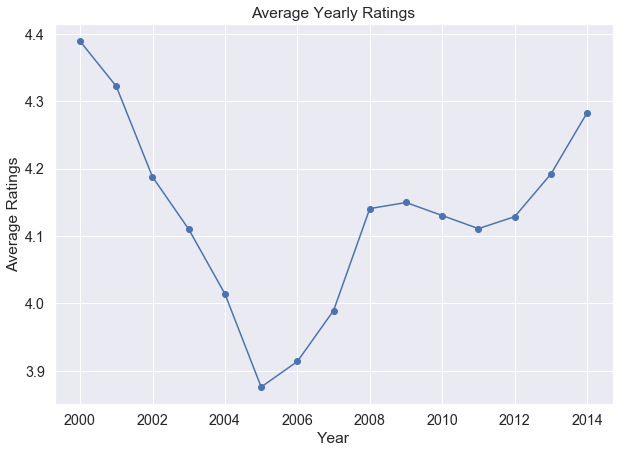

In [6]:
#plot the yearly averages
plt.title('Average Yearly Ratings')
plt.xlabel('Year')
plt.ylabel('Average Ratings')

plt.plot(yearly_ratings, marker='o')
plt.show()

As it was stated before, it can be seen that there is a steep drop in average ratings with the all time low in 2005. Taking a look at the proportions of ratings each year may show some interesting observations. To do this, the count of each rating will be taken for each year. For each rating and for each year, the count for that rating will be divided by the total count of the other ratings in order to obtain the yearly proportions. A for loop will be used in order to calculate the proportion of each rating and plot them all on the same figure.

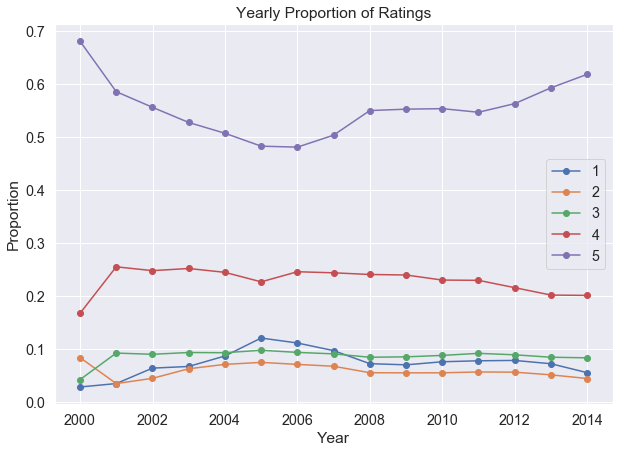

In [23]:
#list of ratings to loop through
ratings = [1,2,3,4,5]

for rating in ratings:
    #filtering by the current rating in the loop
    rating_filter = df_time_rating[df_time_rating.rating == rating]
    #filtering by all other ratings
    rating_other = df_time_rating[df_time_rating.rating != rating]
    
    #resampling by the count of the rating per year
    yearly_ratings_count = rating_filter.resample('1y').count()
    #resampling by the count of the other ratings per year
    yearly_ratings_count_other = rating_other.resample('1y').count()
    #calculating the proportion of the rating: count/(total count)
    yearly_proportions = yearly_ratings_count/(yearly_ratings_count_other + yearly_ratings_count)
    #plotting for each rating
    plt.plot(yearly_proportions, marker='o', label=rating)

plt.title('Yearly Proportion of Ratings')
plt.xlabel('Year')
plt.ylabel('Proportion')
plt.legend()
plt.show()

This plot shows that after the initial year of 2000, the proportion of ratings for 2, 3, and 4 remain relatively stable. However, the ratings of 1 and 5 appear to be a bit more dynamic. It is seen that the proportion of ratings that are 5 decreases until the years of 2005 and 2006. At the same time, the proportion of ratings that are 1 increases and peaks at the year of 2005. This along with the slight decrease for the proportion of 4 ratings in 2005 matches what is seen in the original average yearly ratings plot. From this plot it can be observed that the major movements in the yearly average ratings are mainly due to the proportion of ratings for 5 and 1 along with a gradual change in the proportion of ratings that are 4.

### Amount of Ratings Yearly

The plot of amount of ratings yearly follows an exponential curve. This can be turned into a linear relationship by performing a log transformation on the count of ratings yearly. With a linear relationship, a linear regression line can be fit to the data in order to form predictions on the yearly count of ratings.

The dataset will first be resampled yearly with an aggregation on the count of ratings. The DataFrame will be shown and then plotted.

In [32]:
#resampling yearly with counts of ratings
yearly_counts = df_time_rating.resample('1y').count()
#visualizing the DataFrame
yearly_counts

,rating
reviewTime,
1999-12-31,72
2000-12-31,817
2001-12-31,1609
2002-12-31,2315
2003-12-31,3547
2004-12-31,5159
2005-12-31,9638
2006-12-31,15447
2007-12-31,35976


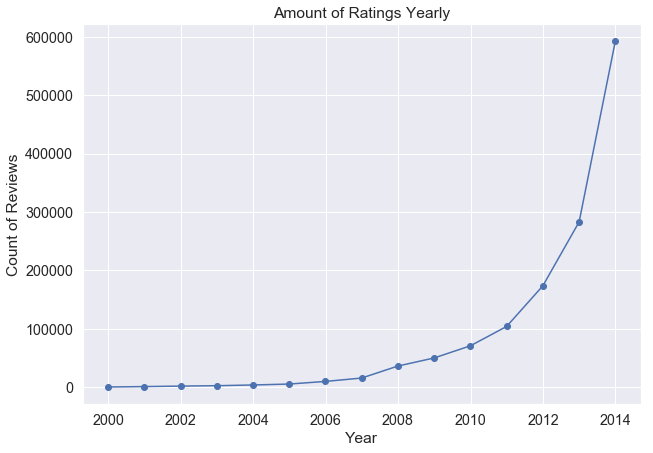

In [33]:
#plotting yearly counts
plt.title('Amount of Ratings Yearly')
plt.xlabel('Year')
plt.ylabel('Count of Reviews')

plt.plot(yearly_counts, marker='o')
plt.show()

This exponential curve can be turned into a linear one by transforming the count of reviews with the logarithm. Plotting the log of count of reviews against the years shows this linearity.

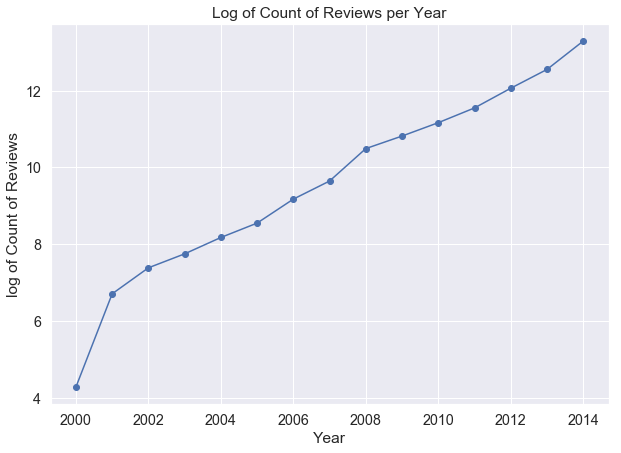

In [36]:
#log transform of count of ratings
log_ratings = np.log(yearly_counts.rating)
#storing the years in a variable
years = yearly_counts.index.year + 1

#plotting the log of counts vs years
plt.plot(years, log_ratings, marker='o')

plt.ylabel('log of Count of Reviews')
plt.xlabel('Year')
plt.title('Log of Count of Reviews per Year')
plt.show()

Except for the years between 2000-2001, the plot shows a very linear relationship between the log of the count of reviews per year. A linear regression line will be fit to this data and the R<sup>2</sup> value will be calculated to observe how much of the variance in the log of count of reviews can be explained by the Year value.

The scikit-learn package will be used to fit the linear regression. Given that there is only 1 feature, the year, the array will need to be reshaped in order for scikit-learn to acccept it. 

In [73]:
from sklearn.linear_model import LinearRegression

#instantiating the linear regression model
lin = LinearRegression()
#reshaping the feature array
X = np.array(years).reshape(-1,1)
#storing the log of rating counts in the y variable
y = log_ratings

#fitting the linear regression model on X and y
lin.fit(X, y)
#calculating the y values for the linear regression
y_pred = lin.predict(X)
#calculating the R-squared value for the linear regression
r2 = lin.score(X,y)

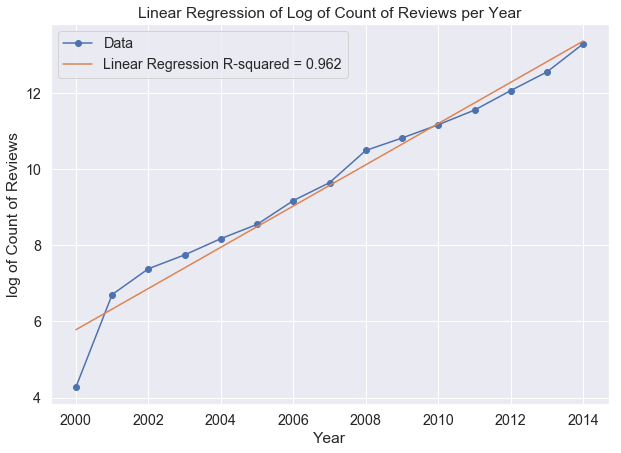

In [76]:
#plotting the linear regression line on top of the actual data
plt.plot(years, log_ratings, marker='o', label='Data')
plt.plot(X, y_pred, label='Linear Regression R-squared = {:0.3f}'.format(r2))

plt.ylabel('log of Count of Reviews')
plt.xlabel('Year')
plt.title('Linear Regression of Log of Count of Reviews per Year')
plt.legend()
plt.show()

The linear regression line does a good job at fitting the actual data. The R<sup>2</sup> value of 0.962 indicates that about 96% of the variance in the log of count of reviews can be explained by the year value. With this linear regression model the total amount of reviews that is given or received can be predicted for any year of interest.

In [90]:
#if this is good enough, write report.
#start working on milestone report

#does RMSE make sense? not training and testing, so would be predicting on already known values perhaps R2 is good enough?
#will probably need p-value calculation, need to read to learn more about it

###LOOK BELOW TO THINK ABOUT CALCULATING THE P VALUE, also read ISL to learn more about it

In [89]:
lin.intercept_, lin.coef_

(-1077.3415318815316, array([0.54156151]))

In [88]:
import statsmodels.api as sm
X2 = sm.add_constant(X)
formula = sm.OLS(y, X2)
formula_fit = formula.fit()
formula_fit.summary()

C:\Users\Thompson\Anaconda3\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     333.1
Date:                Sun, 13 Oct 2019   Prob (F-statistic):           1.20e-10
Time:                        15:24:17   Log-Likelihood:                -9.7098
No. Observations:                  15   AIC:                             23.42
Df Residuals:                      13   BIC:                             24.84
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1077.3415     59.557    -18.089      0.000   -1206.007    -948.676
x1             0.5416      0.030     18.250      0.000       0.477       0.606
==============================================================================
Omnibus:                       22.368   Durbin-Watson:                   1.219
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.957
Skew:                          -2.117   Prob(JB):                     3.81e-06
Kurtosis:                       7.691   Cond. No.                     9.32e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [47]:
from scipy import stats
lr = stats.linregress(X,y)

ValueError: all the input array dimensions except for the concatenation axis must match exactly

In [39]:
years

Int64Index([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
            2011, 2012, 2013, 2014],
           dtype='int64', name='reviewTime')

In [40]:
#might not be explanable by just looking at the data
#perhaps a there was a good promotion that increased the growth
#do not pursue? just look at hypothesis test for the average yearly ratings?
#not only count of ratings increased, but also proportion of ratings that were 5 went up
#can i break up the count of yearly ratings into something smaller that can be observed?
#something that may show why it spiked up in 2007-2008?
#if not, what else can i saw about the growth?
#what else could it indicate? What can it show? what does it mean?
#can I group up all the counts?
#I could fit a linear regression line to it and make forcast the growth of the years


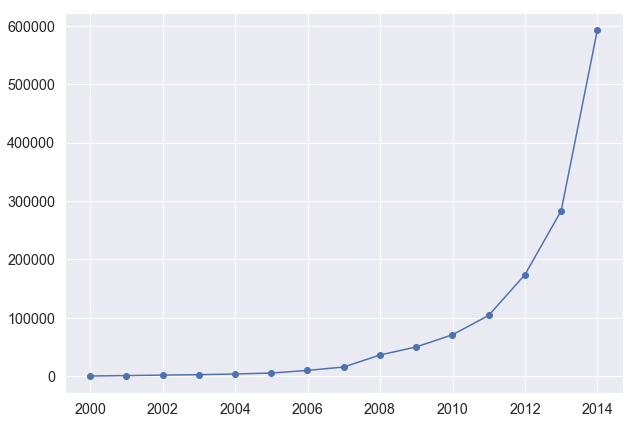

In [41]:
plt.plot(yearly_counts, marker='o')
plt.show()

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
lin = LinearRegression()
X = np.array(yearly_counts.index.year).reshape(-1,1)
#np.array(yearly_counts.index).reshape(-1,1)
y = np.log(yearly_counts.rating)
lin.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [44]:
y_pred = lin.predict(X)

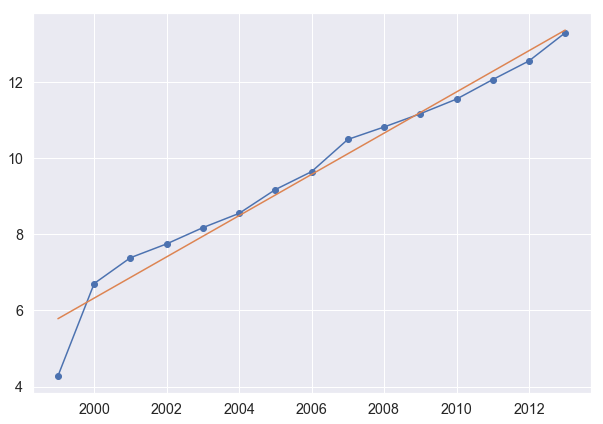

In [45]:
plt.plot(yearly_counts.index.year, np.log(yearly_counts.rating), marker='o')
plt.plot(X, y_pred)
plt.show()

In [46]:
from sklearn.metrics import mean_squared_error
score = mean_squared_error(y, y_pred)
score

0.21368790826795012

In [20]:
lin.predict([[2014],[2015],[2016],[2017]])


array([13.90491989, 14.44648141, 14.98804292, 15.52960444])

In [21]:
np.exp(lin.predict([[2014],[2015],[2016],[2017]]))

array([1093528.18507622, 1879434.3434702 , 3230162.23963999,
       5551642.77520498])